# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv("/content/Dataset_inisiasi.csv")

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# Select relevant features based on clustering criteria
numerical_features = ['rating', 'members']
target = 'cluster'

# Prepare final dataset
X = df[numerical_features]
y = df[target]

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)

# Train XGBoost model
xgb = XGBClassifier(n_estimators=50, max_depth=10, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

**Random Forest**

- `n_estimators=50`: Menggunakan 50 pohon dalam ensemble.
- `max_depth=10`: Setiap pohon memiliki kedalaman maksimum 10, yang membantu mencegah overfitting.
- `min_samples_split=5`: Minimal 5 sampel diperlukan untuk membagi node, sehingga pohon tidak terlalu kompleks.
- `random_state=42`: Menjamin hasil eksperimen yang sama setiap kali dijalankan.

**XNBoost**
- `n_estimators=50`: Menggunakan 50 pohon keputusan.
- `max_depth=10`: Setiap pohon memiliki kedalaman maksimum 10.
- `learning_rate=0.1`: Laju pembelajaran cukup konservatif, yang membantu mencegah overfitting tetapi memerlukan lebih banyak iterasi untuk konvergensi.
- `random_state=42`: Untuk memastikan hasil yang konsisten.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [5]:
# Predict on test data
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy (with SMOTE): {accuracy_rf:.4f}')

# Predict on test data
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy (with SMOTE): {accuracy_xgb:.4f}')

Random Forest Accuracy (with SMOTE): 0.9944
XGBoost Accuracy (with SMOTE): 0.9887


In [6]:
# Create DataFrame for evaluation metrics
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
xgb_report = classification_report(y_test, y_pred_xgb, output_dict=True)

df_rf_report = pd.DataFrame(rf_report).transpose()
df_xgb_report = pd.DataFrame(xgb_report).transpose()

In [7]:
# Display the evaluation metrics
print("Random Forest Evaluation Metrics (Before Tunning):")
display(df_rf_report)

Random Forest Evaluation Metrics (Before Tunning):


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,955.00000
1,1.000000,1.000000,1.000000,1028.00000
2,1.000000,0.997957,0.998978,979.00000
3,0.990644,1.000000,0.995300,953.00000
4,0.996954,0.959922,0.978088,1023.00000
5,0.985743,1.000000,0.992821,968.00000
6,0.992872,1.000000,0.996423,975.00000
7,0.989000,0.998990,0.993970,990.00000
accuracy,0.994410,0.994410,0.994410,0.99441
macro avg,0.994402,0.994609,0.994447,7871.00000


In [8]:
# Display the evaluation metrics
print("XGBoost Evaluation Metrics (Before Tunning):")
display(df_xgb_report)

XGBoost Evaluation Metrics (Before Tunning):


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,955.000000
1,0.994158,0.993191,0.993674,1028.000000
2,0.987718,0.985700,0.986708,979.000000
3,0.981366,0.994753,0.988015,953.000000
4,0.992901,0.956989,0.974614,1023.000000
5,0.985729,0.998967,0.992304,968.000000
6,0.985743,0.992821,0.989269,975.000000
7,0.981946,0.988889,0.985405,990.000000
accuracy,0.988693,0.988693,0.988693,0.988693
macro avg,0.988695,0.988914,0.988749,7871.000000


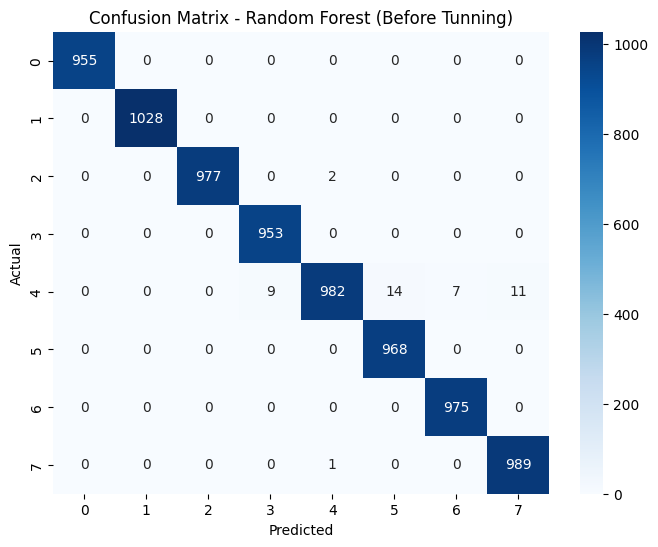

In [9]:
# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Before Tunning)')
plt.show()

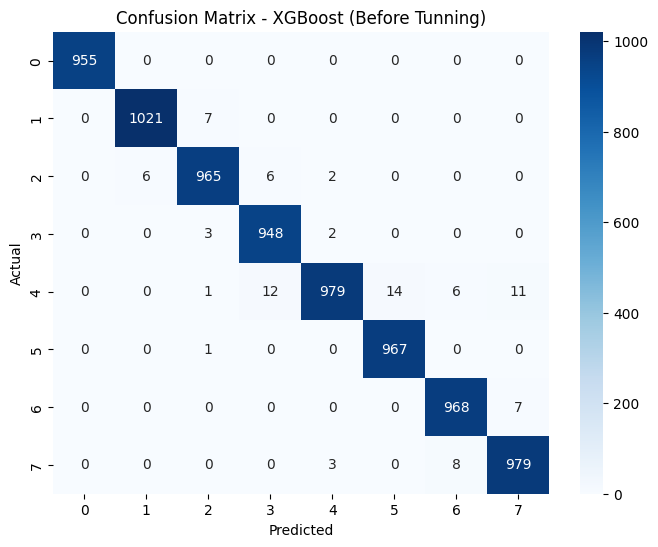

In [10]:
# Confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost (Before Tunning)')
plt.show()

**Perbandingan Model Random Forest vs XGBoost**

Akurasi:

- Random Forest: 99.44%
- XGBoost: 98.87%

Kesimpulan:
- Random Forest lebih akurat dibandingkan XGBoost.
- XGBoost hampir sama dengan Random Forest, tetapi memiliki lebih banyak kesalahan klasifikasi.
- Random Forest direkomendasikan jika prioritas utama adalah akurasi.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [11]:
# Hyperparameter tuning for Random Forest using GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1, verbose=2)
gs_rf.fit(X_train, y_train)
best_rf = gs_rf.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [12]:
# Hyperparameter tuning for XGBoost using RandomizedSearchCV
param_dist_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}
rs_xgb = RandomizedSearchCV(XGBClassifier(random_state=42), param_dist_xgb, n_iter=5, cv=3, n_jobs=-1, verbose=2, random_state=42)
rs_xgb.fit(X_train, y_train)
best_xgb = rs_xgb.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [13]:
# Train Random Forest model with best parameters
best_rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print("Random Forest Classification Report (After Tunning):\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9942
Random Forest Classification Report (After Tunning):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       955
           1       1.00      1.00      1.00      1028
           2       1.00      1.00      1.00       979
           3       0.99      1.00      1.00       953
           4       0.99      0.96      0.98      1023
           5       0.99      1.00      0.99       968
           6       0.99      1.00      1.00       975
           7       0.99      1.00      0.99       990

    accuracy                           0.99      7871
   macro avg       0.99      0.99      0.99      7871
weighted avg       0.99      0.99      0.99      7871



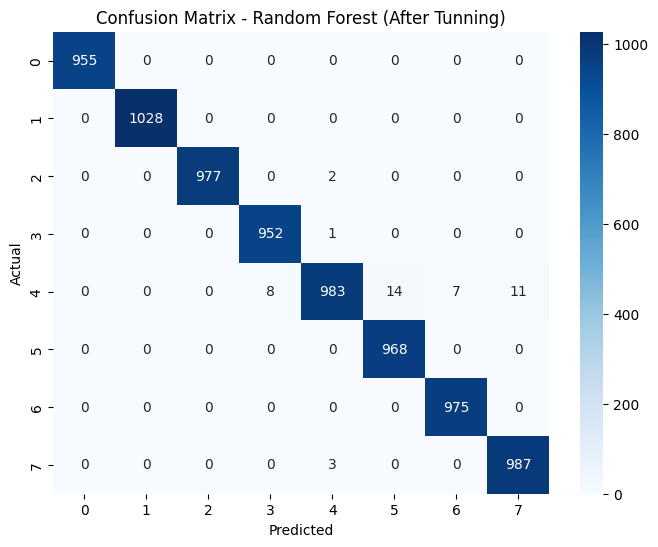

In [14]:
# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (After Tunning)')
plt.show()

In [15]:
# Train XGBoost model with best parameters
best_xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = best_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')
print("XGBoost Classification Report (After Tunning):\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9887
XGBoost Classification Report (After Tunning):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       955
           1       0.99      0.99      0.99      1028
           2       0.99      0.98      0.99       979
           3       0.98      0.99      0.99       953
           4       0.99      0.95      0.97      1023
           5       0.99      1.00      0.99       968
           6       0.99      0.99      0.99       975
           7       0.98      0.99      0.99       990

    accuracy                           0.99      7871
   macro avg       0.99      0.99      0.99      7871
weighted avg       0.99      0.99      0.99      7871



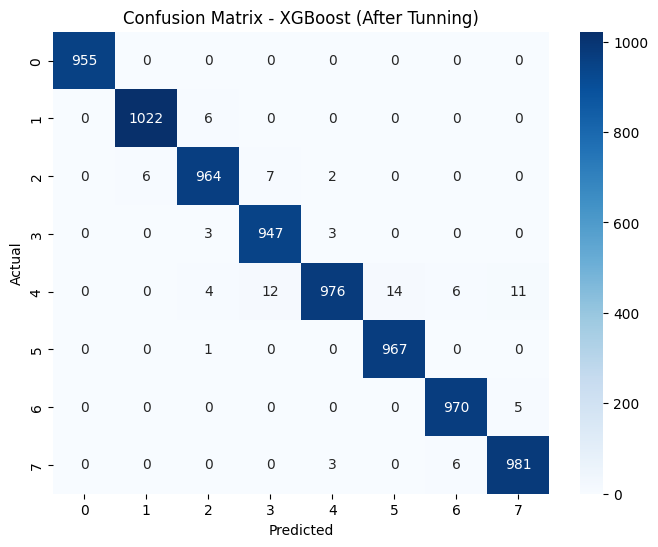

In [16]:
# Confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost (After Tunning)')
plt.show()

In [17]:
# Evaluasi model Random Forest pada data training
y_pred_train_rf = best_rf.predict(X_train)
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
print(f'Random Forest Accuracy (Training): {accuracy_train_rf:.4f}')

# Evaluasi model Random Forest pada data testing
y_pred_test_rf = best_rf.predict(X_test)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
print(f'Random Forest Accuracy (Testing): {accuracy_test_rf:.4f}')

# Evaluasi model XGBoost pada data training
y_pred_train_xgb = best_xgb.predict(X_train)
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
print(f'XGBoost Accuracy (Training): {accuracy_train_xgb:.4f}')

# Evaluasi model XGBoost pada data testing
y_pred_test_xgb = best_xgb.predict(X_test)
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
print(f'XGBoost Accuracy (Testing): {accuracy_test_xgb:.4f}')

Random Forest Accuracy (Training): 0.9969
Random Forest Accuracy (Testing): 0.9942
XGBoost Accuracy (Training): 0.9939
XGBoost Accuracy (Testing): 0.9887


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### **Analisis Perbandingan Sebelum dan Setelah Tuning**

#### 1. Perbandingan Evaluasi Random Forest
Sebelum tuning, Random Forest memiliki akurasi sebesar 99.44%, sedangkan setelah tuning akurasinya sedikit turun menjadi 99.42%. Dari segi recall, kelas 4 menunjukkan nilai yang lebih rendah dibandingkan kelas lainnya, yaitu sekitar 95.99% sebelum tuning dan 96% setelah tuning.

#### 2. Perbandingan Evaluasi XGBoost
Sebelum tuning, akurasi XGBoost adalah 98.87%, dan setelah tuning nilainya tetap sama di 98.87%. Namun, recall untuk kelas 4 justru mengalami sedikit penurunan dari 95.69% menjadi 95% setelah tuning.

#### 3. Identifikasi Kelemahan Model
- **Recall Rendah untuk Kelas 4**: Baik Random Forest maupun XGBoost menunjukkan performa yang lebih rendah dalam mengklasifikasikan kelas 4 dibandingkan kelas lainnya.
- **Potensi Overfitting pada Random Forest**: Akurasi training lebih tinggi dibandingkan dengan testing, yang menunjukkan kemungkinan adanya overfitting tetapi masih dalam batas wajar.
- **Tuning Tidak Signifikan**: Hasil tuning tidak memberikan peningkatan yang signifikan terhadap performa model.

#### 4. Rekomendasi Tindakan Lanjutan
1. Menggunakan metode Feature Selection seperti SHAP atau Permutation Importance untuk memilih fitur yang paling relevan.
2. Menggunakan pendekatan Stacking Model atau mencoba algoritma lain seperti LightGBM.
3. Mengurangi jumlah pohon keputusan dan menambahkan teknik pruning untuk mengurangi overfitting.
4. Menggunakan metode seperti Bayesian Optimization untuk mencari parameter optimal.
